# Лабораторне заняття №10

# Закон великих чисел, метод Монте-Карло, центральна гранична теорема

Деякі задачі взяті з підручника

*Збірник задач з теорії ймовірностей та математичної статистики: навч. посібник / В.В. Голомозий, М.В. Карташов, К.В. Ральченко. – К.: Видавничо-поліграфічний центр «Київський університет», 2015. – 366 с.*

Електронну версію збірника можна знайти [за посиланням](http://probability.univ.kiev.ua/userfiles/kmv/gkr-problems.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Закон великих чисел (посилений)

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu$.
Тоді
$$
\frac{\xi_1 + \ldots + \xi_n}{n} \to \mu, \qquad n \to \infty, \quad \text{м.н.}
$$
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.

### 1.1 Розподіл Бернуллі

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Bernoulli(p), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $p = 0.05, 0.25, 0.5, 0.75, 0.95$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $p$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

Bernoulli(0.05)


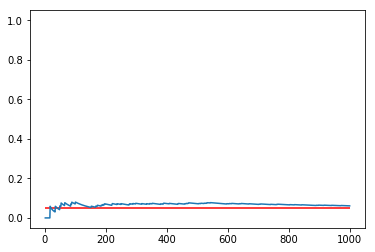

Bernoulli(0.25)


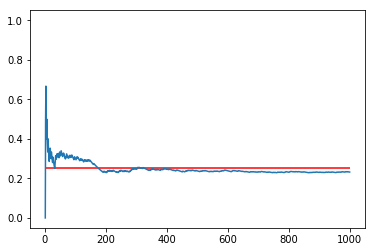

Bernoulli(0.5)


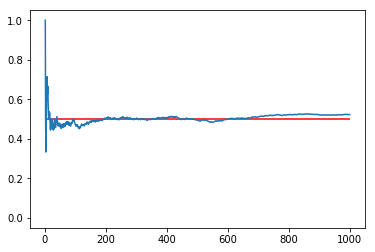

Bernoulli(0.75)


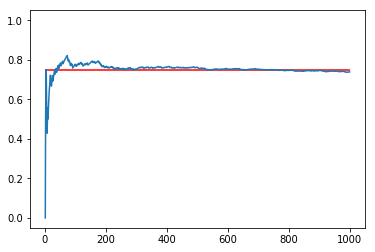

Bernoulli(0.95)


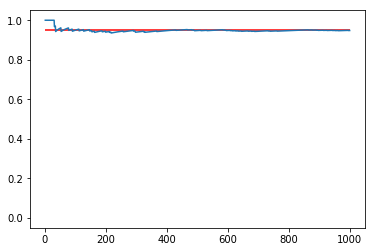

In [6]:
from scipy.stats import bernoulli

ps = [0.05, 0.25, 0.5, 0.75, 0.95]
n = 1000

for p in ps:
    print('Bernoulli({})'.format(p))
    
    xi = bernoulli(p=p)

    xi_rvs = xi.rvs(size=n)
    xi_rvs_cum = xi_rvs.cumsum()
    nk = np.arange(1, n+1)
    pk = xi_rvs_cum / nk

    plt.plot(nk, pk)
    plt.hlines(p, 1, n, colors='r')
    plt.ylim((-0.05, 1.05))

    plt.show()
    
    print('='*80)

#### 1.1.1 Функція `numpy.cumsum`

Більш детальна інформація про функцію `numpy.cumsum` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html).

In [2]:
a = np.arange(10)
print(a)
print(np.cumsum(a)) # as a NumPy function
print(a.cumsum()) # as a NumPy array method

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  3  6 10 15 21 28 36 45]
[ 0  1  3  6 10 15 21 28 36 45]


In [4]:
a = a.reshape((2,5)) # reshape vector to a 2x5 matrix
print(a)
print(a.cumsum()) # matrix will flatten back to a vector
print(a.cumsum(axis=0)) # cumulative sum over rows for each column
print(a.cumsum(axis=1)) # cumulative sum over columns for each row

[[0 1 2 3 4]
 [5 6 7 8 9]]
[ 0  1  3  6 10 15 21 28 36 45]
[[ 0  1  2  3  4]
 [ 5  7  9 11 13]]
[[ 0  1  3  6 10]
 [ 5 11 18 26 35]]


### 1.2 Експоненційний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Exp(\lambda), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $\lambda = 0.5, 1, 2, 5$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $\lambda$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

Exp(0.5)


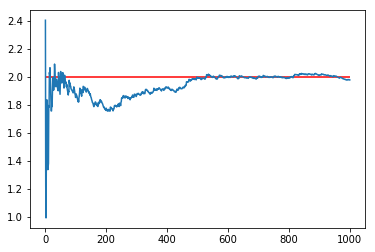

Exp(1)


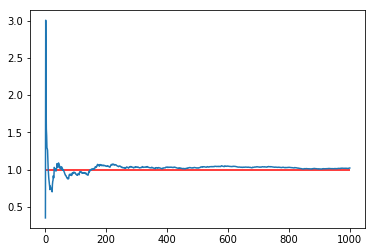

Exp(2)


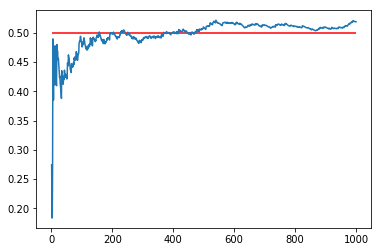

Exp(5)


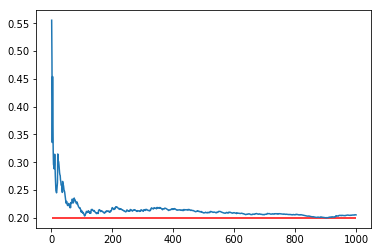

In [7]:
from scipy.stats import expon

lmds = [0.5, 1, 2, 5]
n = 1000

for lmd in lmds:
    print("Exp({})".format(lmd))
    
    xi = expon(scale=1/lmd)

    xi_rvs = xi.rvs(size=n)
    xi_rvs_cum = xi_rvs.cumsum()
    nk = np.arange(1, n+1)
    pk = xi_rvs_cum / nk

    plt.plot(nk, pk)
    plt.hlines(1/lmd, 1, n, colors='r')

    plt.show()
    
    print("="*80)

### 1.3 Задача 1.23.12

Випадкові величини $(\xi_n, n \geq 1)$
незалежні, однаково розподілені, $E[\xi_1] = 0, D(\xi_1) = 1$.
Довести, що $\displaystyle \frac{\max_{1 \leq k \leq n} |\xi_k|}{\sqrt{n}} \xrightarrow{w} 0$.

Нехай $\xi_n \sim N(0, 1)$.

Зобразіть графічно описану в задачі збіжність.

1. Зобразіть графік функції $\displaystyle \frac{\max_{1 \leq k \leq n} |\xi_k|}{\sqrt{n}}$
в залежності від $n = 1, \ldots, 100000$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз
$\displaystyle \frac{\max_{1 \leq k \leq n} |\xi_k|}{\sqrt{n}}$.
3. Виведіть значення цього виразу в точках $n = 10, 100, 1000, 10000, 100000$.
4. Зверність увагу на швидкість збіжності.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.maximum.accumulate`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

Values in the points [    10    100   1000  10000 100000] = [0.75225035 0.32646916 0.11749956 0.04067358 0.01322033]


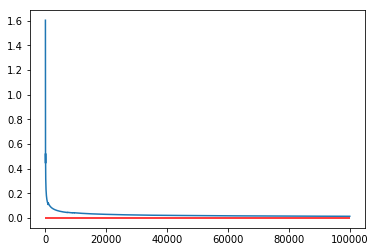

In [13]:
from scipy.stats import norm

params = 10**np.arange(1, 6)
n = 100000

xi = norm()
xi_rvs = xi.rvs(size=n)
nk = np.arange(1, n+1)
xi1_n_rvs = np.maximum.accumulate(np.abs(xi_rvs)) / np.sqrt(nk)
print('Values in the points {} = {}'.format(params, xi1_n_rvs[params-1]))

plt.plot(nk, xi1_n_rvs)
plt.hlines(0, 1, n+1, colors='r')

plt.show()

#### 1.3.1 Функція `numpy.maximum.accumulate`

Більш детальна інформація про функцію `numpy.ufunc.accumulate` в [документації](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.ufunc.accumulate.html).

In [41]:
a = np.random.randint(10, size=10)
print(a)
print(np.maximum.accumulate(a))

[0 4 6 6 1 5 9 5 8 2]
[0 4 6 6 6 6 9 9 9 9]


In [43]:
a = a.reshape((2,5)) # reshape vector to a 2x5 matrix
print(a)
print(np.maximum.accumulate(a, axis=0)) # maximum over rows for each column
print(np.maximum.accumulate(a)) # axis=0 by default
print(np.maximum.accumulate(a, axis=1)) # maximum over columns for each row

[[0 4 6 6 1]
 [5 9 5 8 2]]
[[0 4 6 6 1]
 [5 9 6 8 2]]
[[0 4 6 6 1]
 [5 9 6 8 2]]
[[0 4 6 6 6]
 [5 9 9 9 9]]


## 2 Метод Монте-Карло

Метод Монте-Карло полягає в наближеному обчисленні інтегралів за допомогою випадкових величин.
$$
\idotsint_{A} f \left( \overrightarrow{x} \right) \, d\overrightarrow{x} 
= \idotsint_{\mathbf{R^d}} f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= \idotsint_{\mathbf{R^d}}
\frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)}
f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= E \left[ \frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f \left( \overrightarrow{\xi}_i \right) I_{A} \left( \overrightarrow{\xi}_i \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{\xi}_i \right)},
$$
де $f$ &mdash; деяка функція,
$I_B$ &mdash; індикатор множини $B$,
$\overrightarrow{\xi}, \overrightarrow{\xi}_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $C \supset A$
зі щільністю $f_{\overrightarrow{\xi}}$.

Або, в одномірному випадку,
$$
\int_{a}^{b} f(x) \, dx
= \int_{-\infty}^{+\infty} f(x) I_{(a, b)}(x) \, dx
= \int_{-\infty}^{+\infty} \frac{f(x) I_{(a, b)}(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi) I_{(a, b)}(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)},
$$
де $a, b \in \mathbf{R} \cup \{-\infty, +\infty\}$,
$I_B$ &mdash; індикатор множини $B$,
$f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $A \supset (a, b)$ зі щільністю $f_{\xi}$.

Або
$$
\int_{A} f(x) \, dx
= E\left[ f(\xi) \right] m(A)
\approx \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A),
$$
де $f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в., рівномірно розподілені на множині $A$.

### 2.1 Завдання 2.1

Порахуйте наближено $\displaystyle \int_{0}^{1} x^2 \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$
в залежності від $n = 1, \ldots, 1000$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** При розв'язанні даної задачі зручно взяти $\xi_i \sim Uniform(0, 1)$.

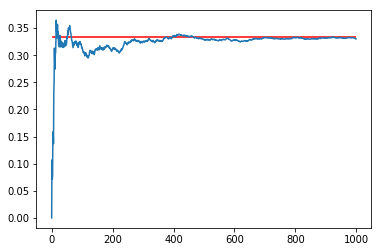

In [247]:
from scipy.stats import uniform

def f(x):
    return x**2

xi = uniform()

n= 1000

x = xi.rvs(size=n)
x = f(x)
x = x.cumsum() / np.arange(1, n+1)

plt.plot(x)
plt.hlines(1/3, 0, n-1, colors='r')

plt.show()

### 2.2 Завдання 2.2

Порахуйте наближено $\displaystyle \int_{1}^{\infty} \frac{1}{x^2} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim Exp(1)$.
2. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
3. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.
4. Порівняйте точність наближення з пунктів $1, 2$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** Замість введення індикатора можна взяти такі $\xi_i$, що $(\xi_i - 1) \sim Exp(1)$.
Тобто поставити параметр `loc=1`.
Тоді
$$
\int_{1}^{\infty} f(x) \, dx
= \int_{1}^{\infty} \frac{f(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i)}{f_{\xi}(\xi_i)}.
$$

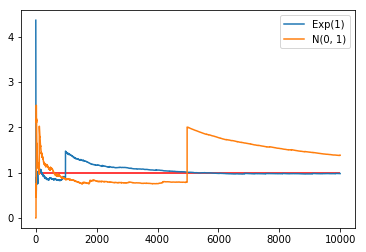

In [33]:
from scipy.stats import expon, norm

def f(x):
    return np.array([1/el**2 if el>=1 else 0 for el in x])

xi1 = expon()
xi2 = norm()

n= 10000

x = xi1.rvs(size=n)
x = f(x) / xi1.pdf(x)
x = x.cumsum() / np.arange(1, n+1)
plt.plot(x, label='Exp(1)')

x = xi2.rvs(size=n)
x = f(x) / xi2.pdf(x)
x = x.cumsum() / np.arange(1, n+1)
plt.plot(x, label='N(0, 1)')

plt.hlines(1, 0, n-1, colors='r')

plt.legend()
plt.show()

## 3 Центральна гранична теорема

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu, D(\xi_1) = \sigma^2$.
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.
Тоді
$$
\sqrt{n} \left( \frac{S_n}{n} - \mu \right) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu) \to \zeta,
\qquad n \to \infty,
$$
де $\zeta \sim N(0, \sigma^2)$.

### 3.1 Рівномірний розподіл

Нехай $(\xi_k, k \geq 1)$ &mdash; н.о.р.в.в., де $\xi_k \sim Uniform(0, 1), k \geq 1$.

Зобразіть графічно збіжність із центральної граничної теореми.

Для кожного $n = 1, 2, 3, 4, 5, 10$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu)$, де $\mu = E[\xi_1]$;
- графік функції щільності $\zeta \sim N(0, \sigma^2)$, де $\sigma^2 = D(\xi_1)$.

**Зауваження.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функцію `numpy.sum(axis=1)`.

n = 1


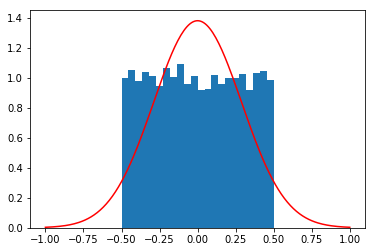

n = 2


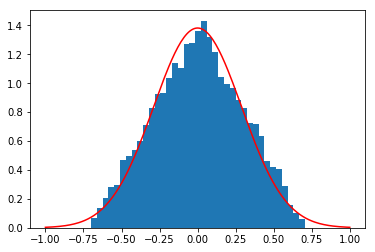

n = 3


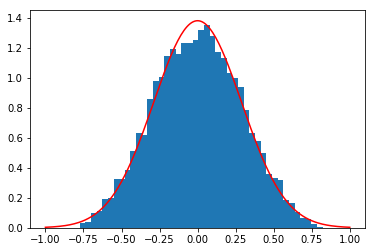

n = 4


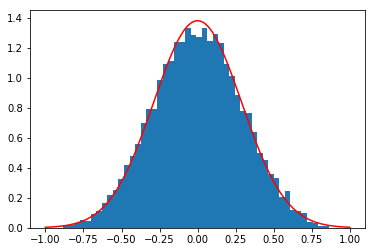

n = 5


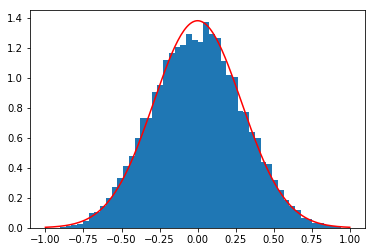

n = 10


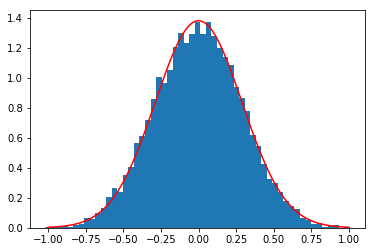

In [206]:
from scipy.stats import uniform, norm

params = [1, 2, 3, 4, 5, 10]
n_samples = 10000

xi = uniform()

for n in params:
    print('n = {}'.format(n))
    
    x = xi.rvs(size=(n_samples, n))
    x = (x - xi.mean()).sum(axis=1) / np.sqrt(n)
    
    xk = np.arange(-1, 1.01, 0.01)
    plt.hist(x, density=True, bins='auto')
    plt.plot(xk, norm.pdf(xk, scale=np.sqrt(xi.var())), 'r')
    plt.show()
    
    print('='*80)

### 3.2 Задача 1.23.13

Випадкові величини $(\xi_n, n \geq 1)$ незалежні, $P(\xi_n = \pm 1) = 1/2$.
Довести, що
$\displaystyle \max_{1 \leq k \leq n} \frac{\xi_1 + \ldots + \xi_k}{\sqrt{n}}
\xrightarrow{w} \left| \zeta \right|, \quad n \to \infty$,
де $\zeta \sim N(0, 1)$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \max_{1 \leq k \leq n} \frac{\xi_1 + \ldots + \xi_k}{\sqrt{n}}$;
- графік функції щільності $\left| \zeta \right|$, де $\zeta \sim N(0, 1)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.cumsum(axis=1)` та `numpy.max(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

**Зауваження 3.** Якщо $\zeta \sim N(0, 1)$, то $\left| \zeta \right| \sim HalfNorm(0, 1)$.

n = 1


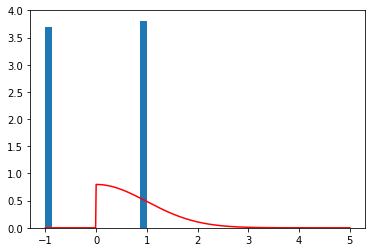

n = 2


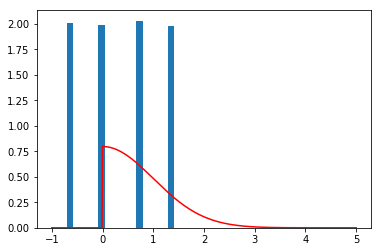

n = 3


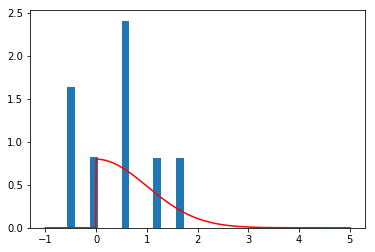

n = 5


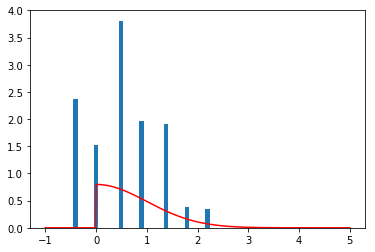

n = 10


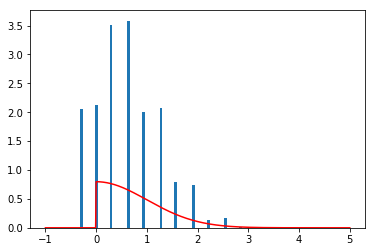

n = 25


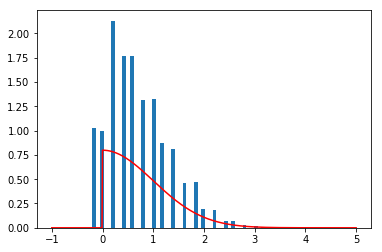

n = 50


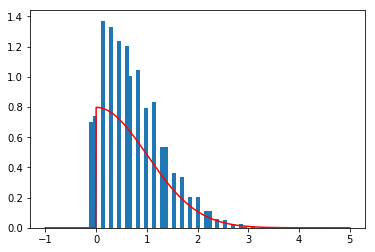

n = 100


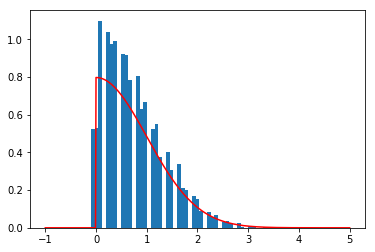

n = 250


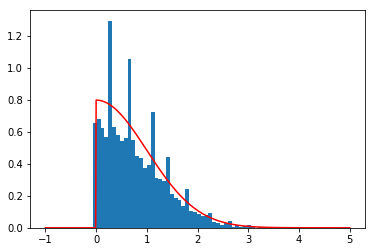

n = 500


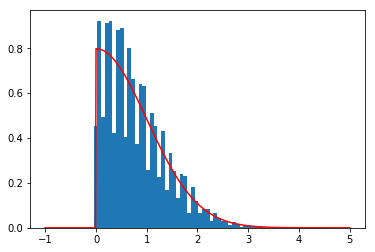

n = 1000


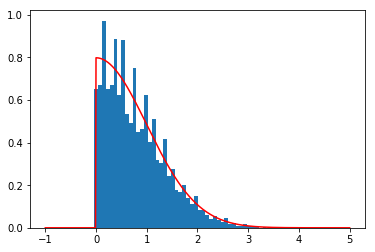

n = 5000


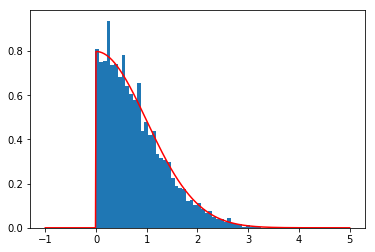

n = 10000


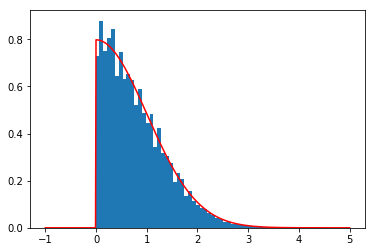

In [229]:
from scipy.stats import expon, halfnorm

params = [1, 2, 3, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]
n_samples = 10000

for n in params:
    print('n = {}'.format(n))
    
    x = np.random.choice([-1,1], size=(n_samples, n))
    x = x.cumsum(axis=1)
    x = x.max(axis=1)
    x = x / np.sqrt(n)
    
    xk = np.arange(-1, 5.01, 0.01)
    plt.hist(x, density=True, bins='auto')
    plt.plot(xk, halfnorm.pdf(xk), 'r')
    plt.show()
    
    print('='*80)

### 3.3 Задача 1.23.30

Випадкові величини $(\xi_k, k \geq 1)$ незалежні та $\xi_k \sim Exp(1)$,
$\displaystyle \widehat{\mu}_n = \frac{\xi_1 + \ldots + \xi_n}{n}$.
Довести, що
$\displaystyle \sqrt{n} \, \frac{\widehat{\mu}_n - 1}{\sqrt{\widehat{\mu}_n}}
\xrightarrow{w} \zeta \sim N(0, 1), \quad n \to \infty$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 200$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \sqrt{n} \, \frac{\widehat{\mu}_n - 1}{\sqrt{\widehat{\mu}_n}}$;
- графік функції щільності $\zeta \sim N(0, 1)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.sum(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

n = 1


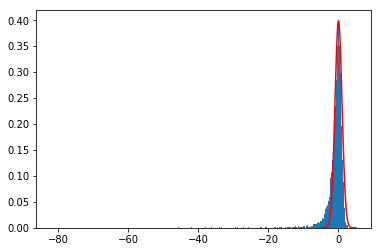

n = 2


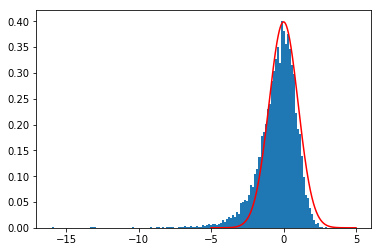

n = 3


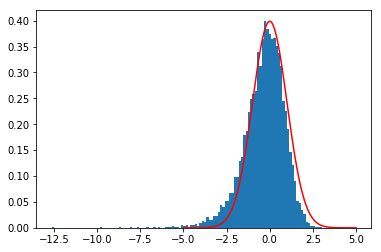

n = 5


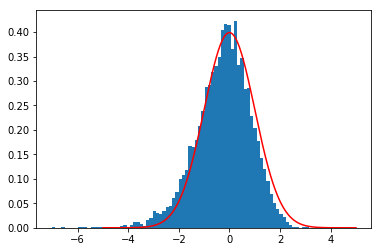

n = 10


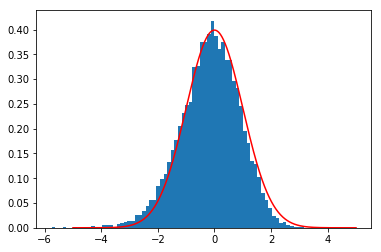

n = 25


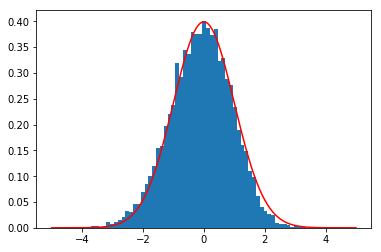

n = 50


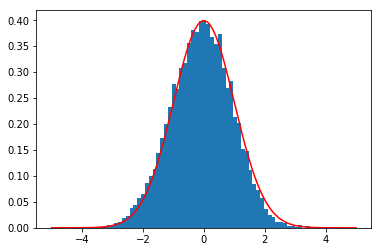

n = 100


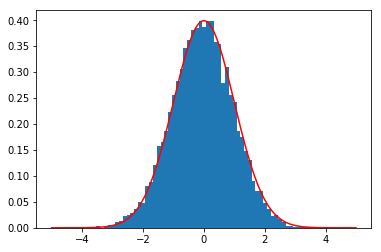

n = 200


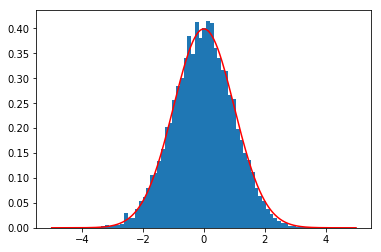

In [228]:
from scipy.stats import expon, norm

params = [1, 2, 3, 5, 10, 25, 50, 100, 200]
n_samples = 10000

xi = expon()

for n in params:
    print('n = {}'.format(n))
    
    x = xi.rvs(size=(n_samples, n))
    x = x.sum(axis=1) / n
    x = np.sqrt(n) * (x - 1) / np.sqrt(x)
    
    xk = np.arange(-5, 5.01, 0.01)
    plt.hist(x, density=True, bins='auto')
    plt.plot(xk, norm.pdf(xk), 'r')
    plt.show()
    
    print('='*80)